<a href="https://colab.research.google.com/github/PedroC-dev/RelatorioAtividadesPDI/blob/main/transformacoes_intensidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

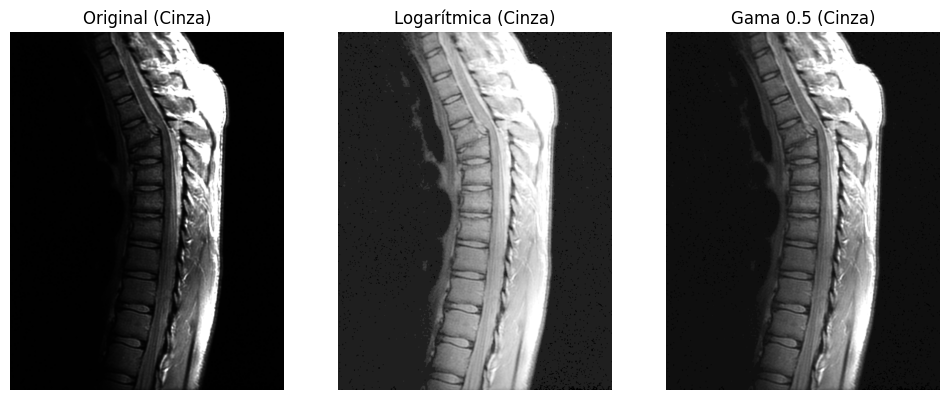

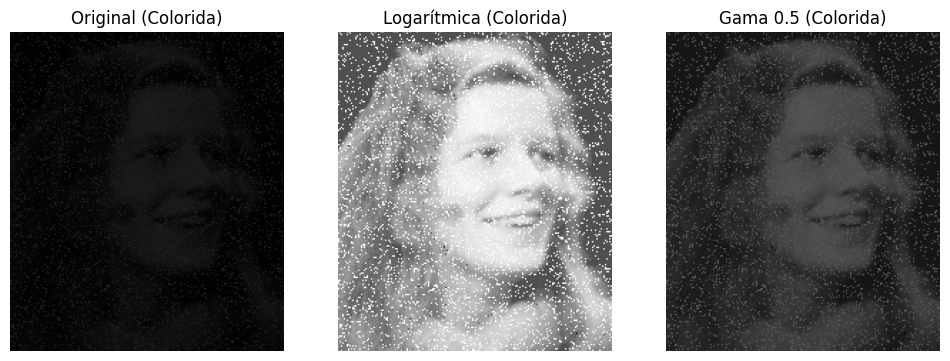

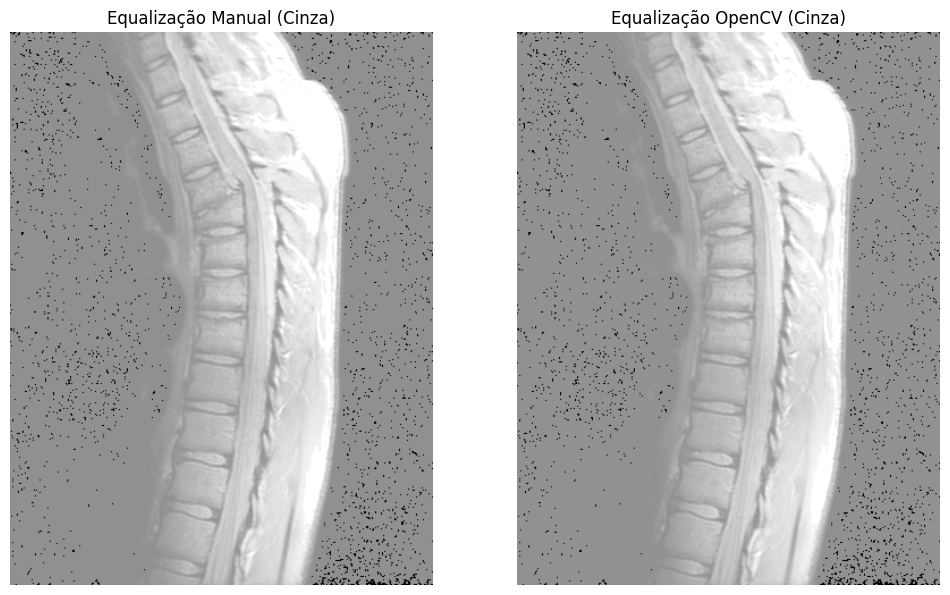

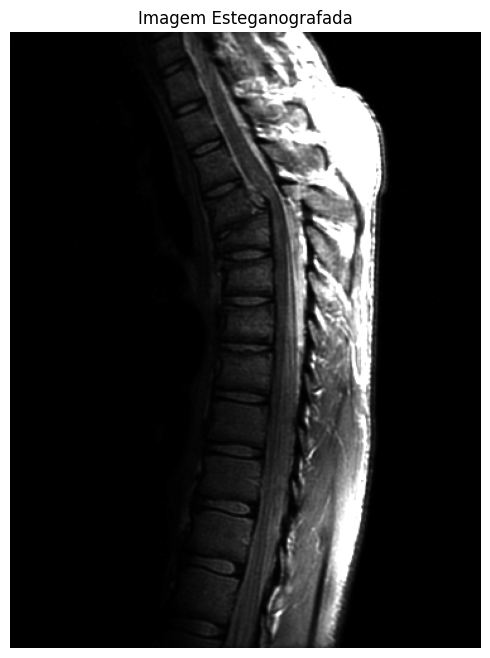

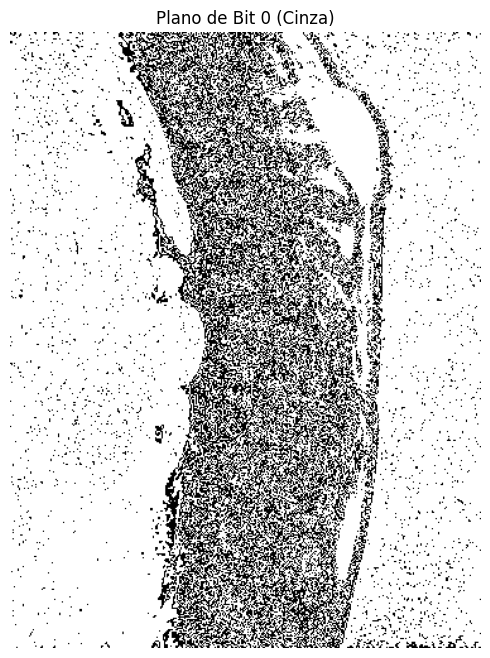

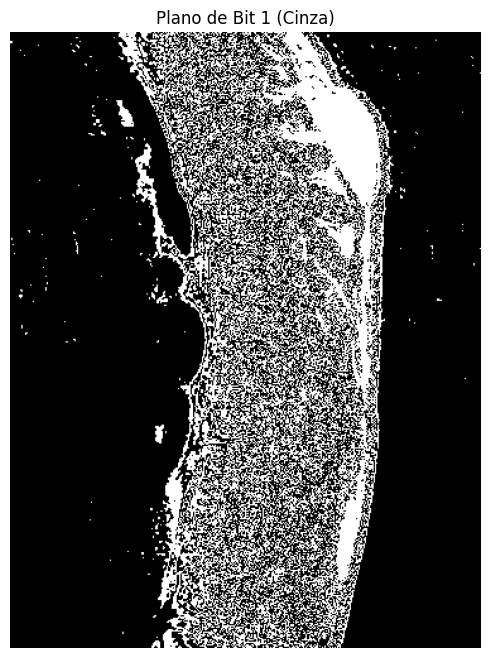

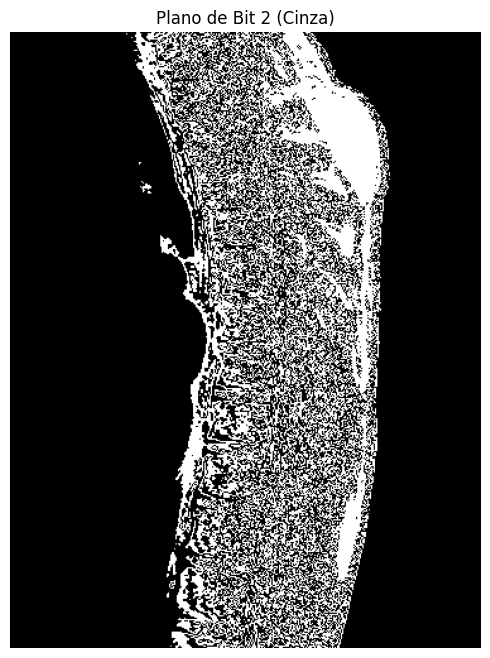

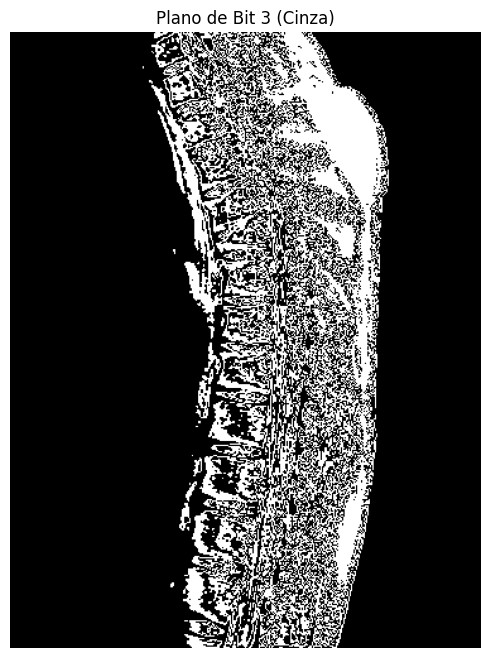

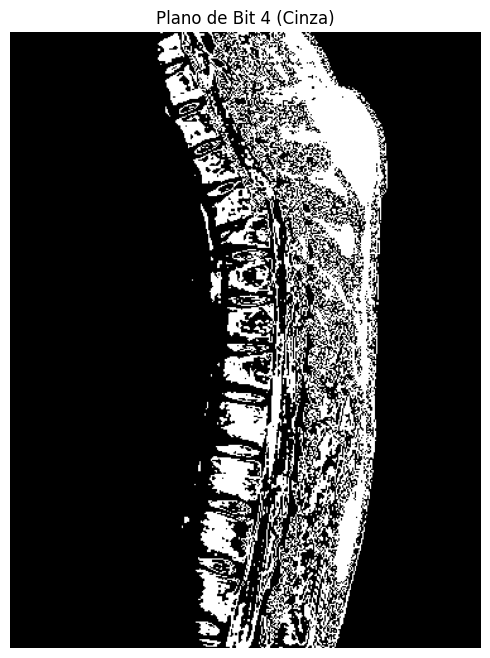

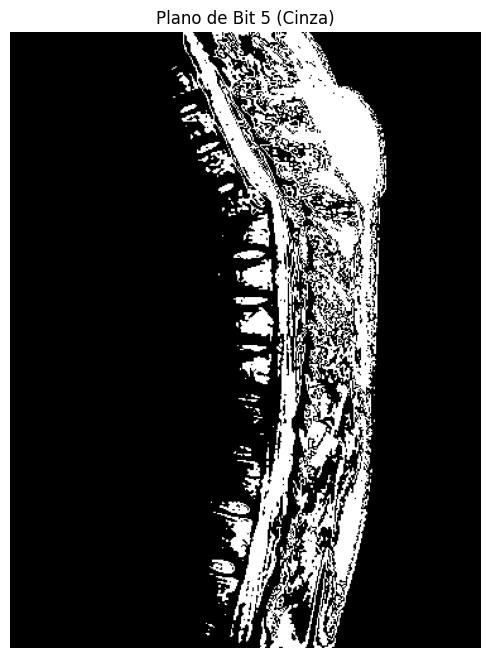

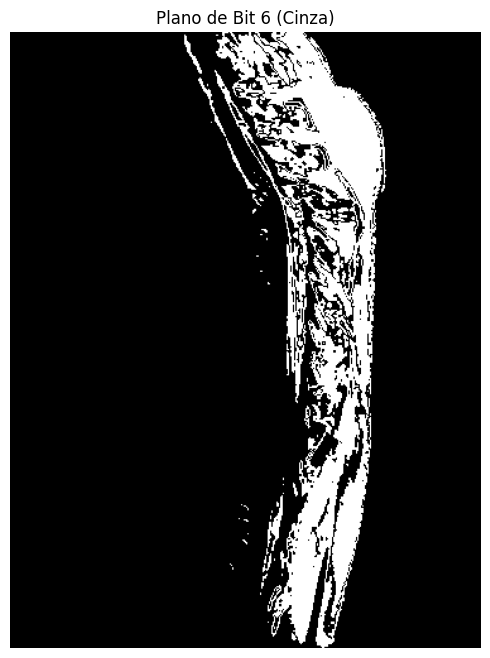

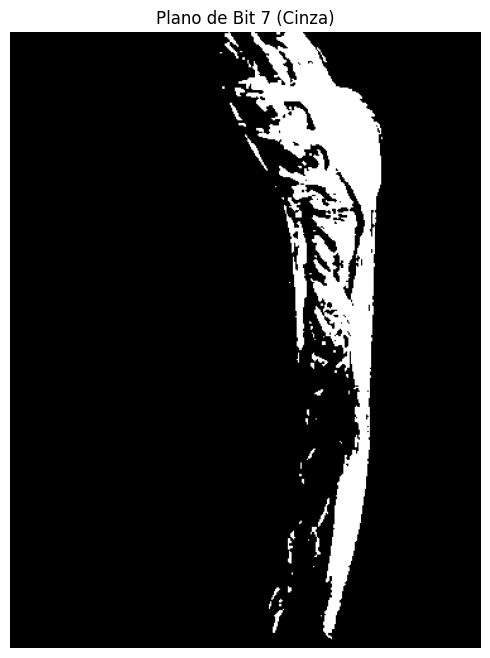

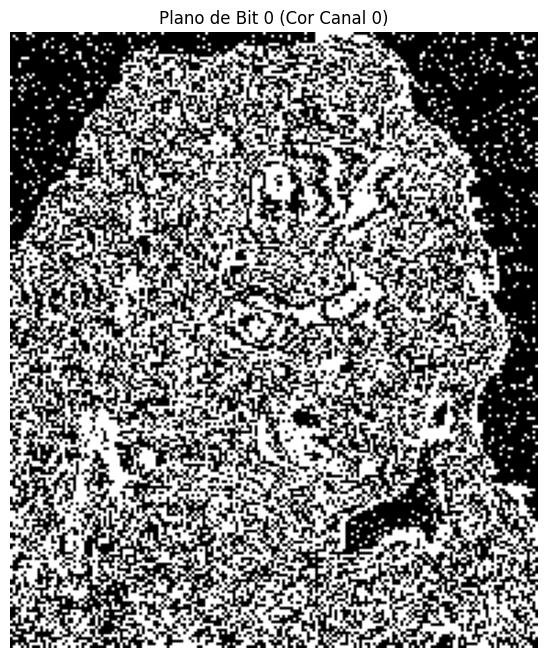

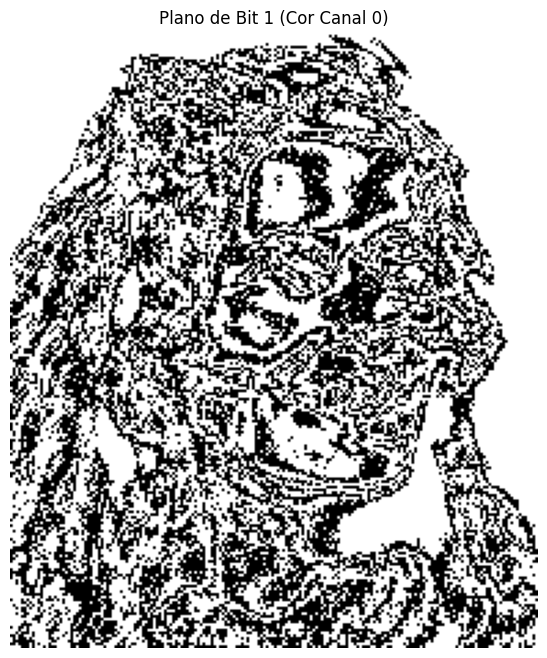

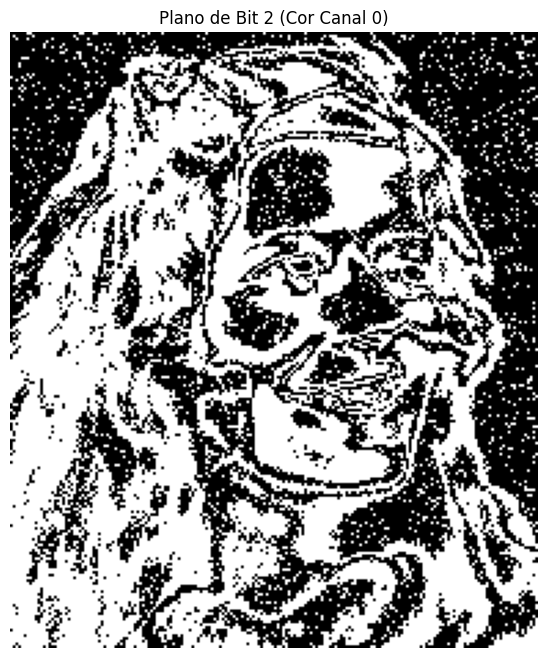

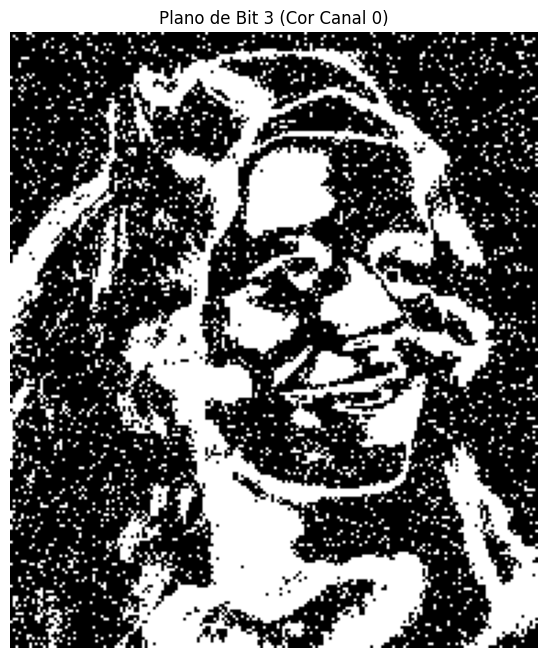

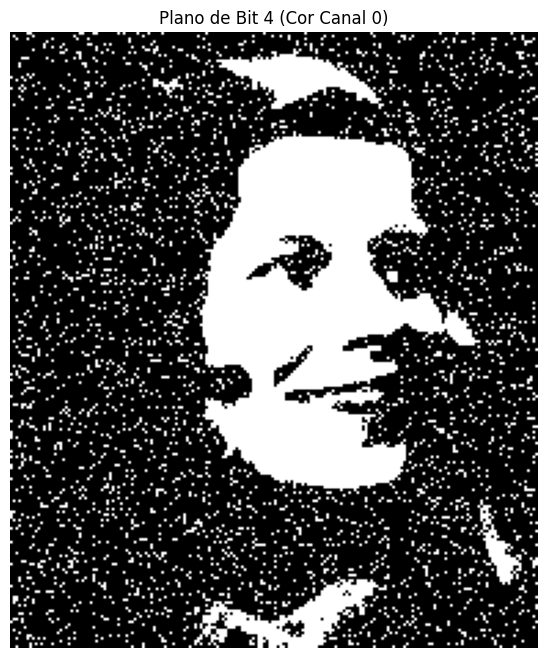

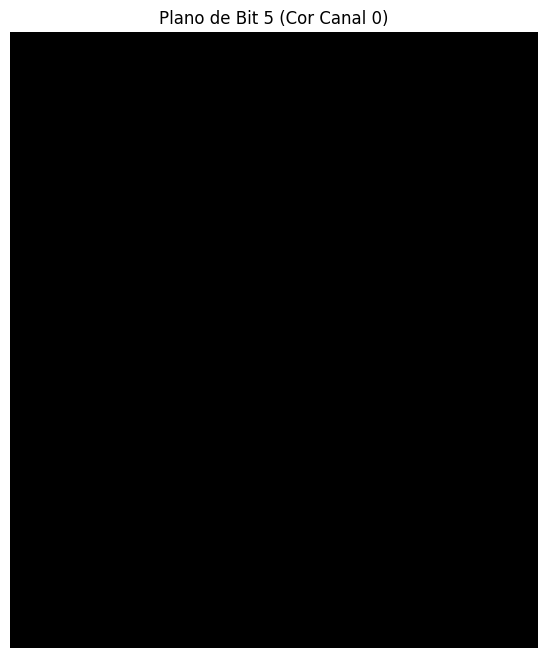

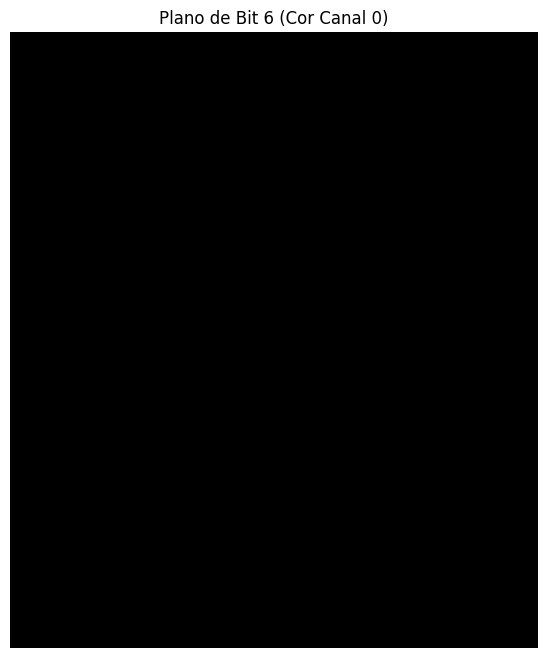

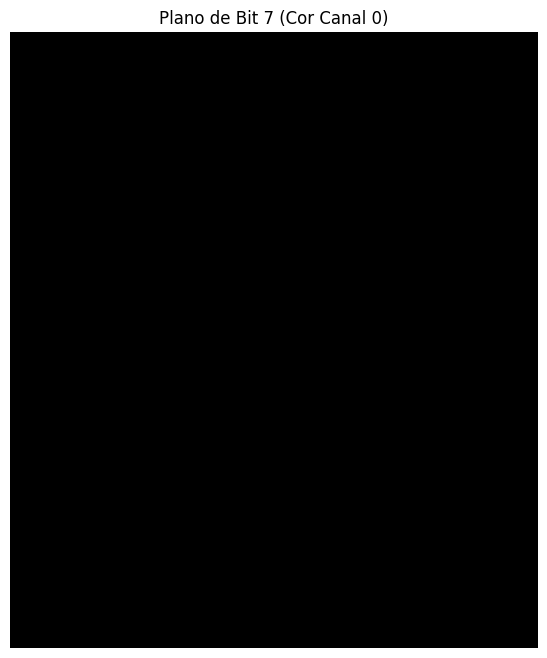

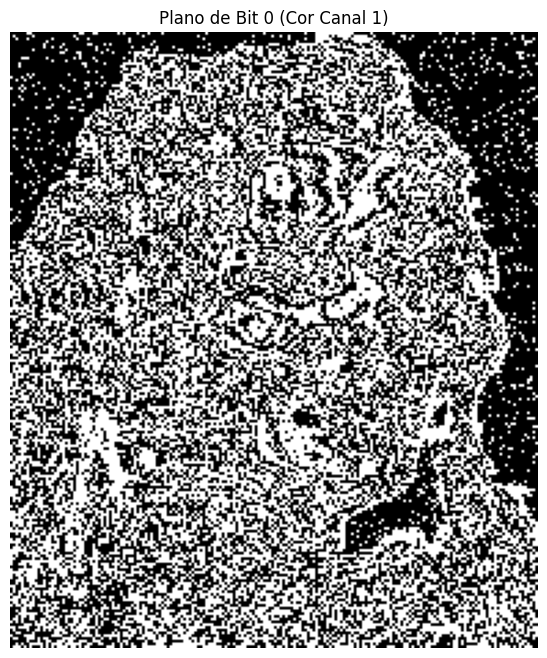

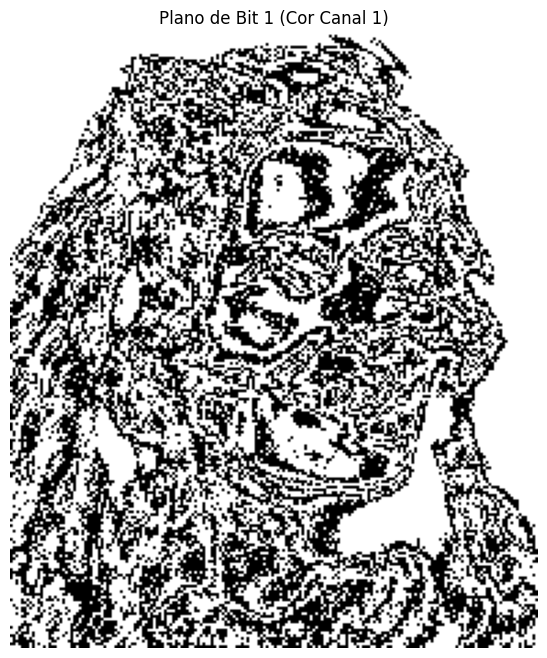

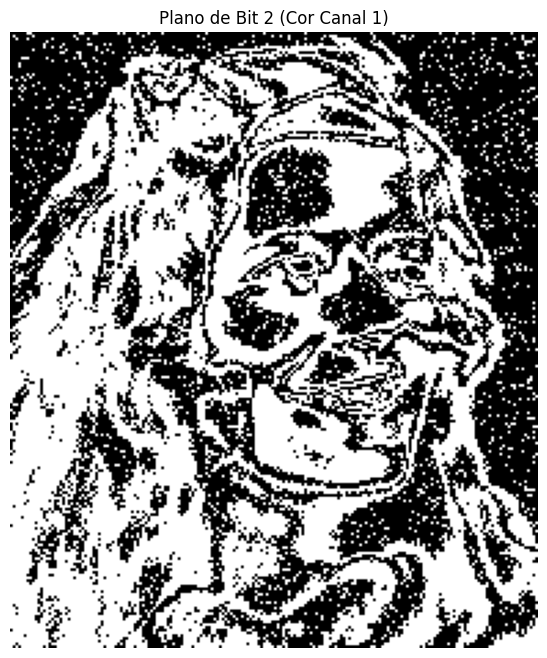

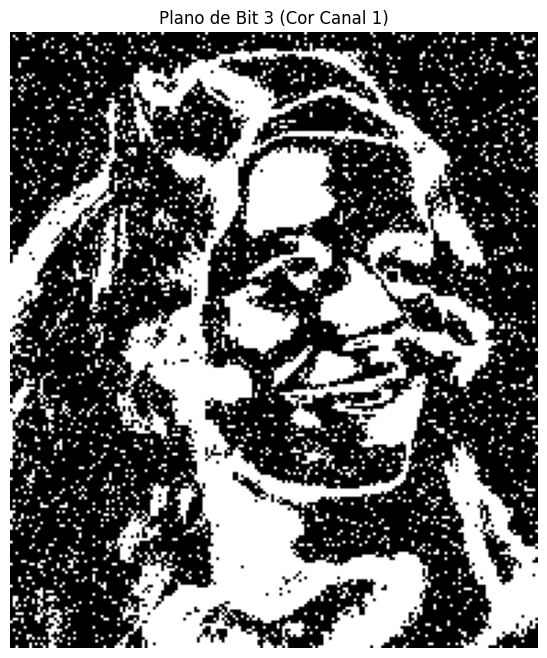

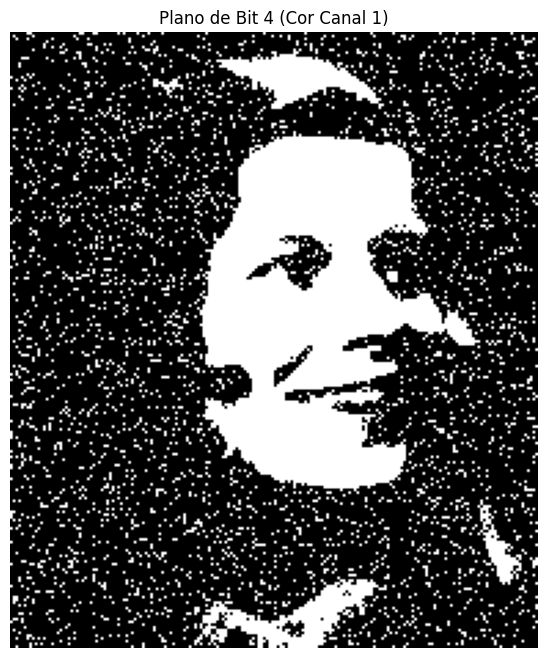

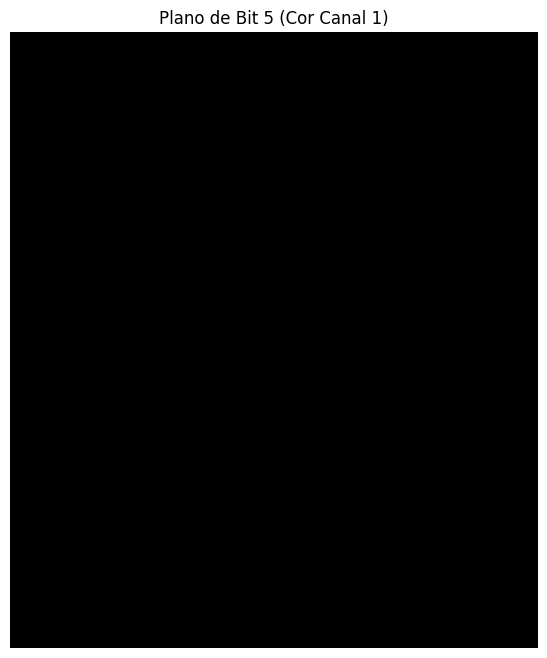

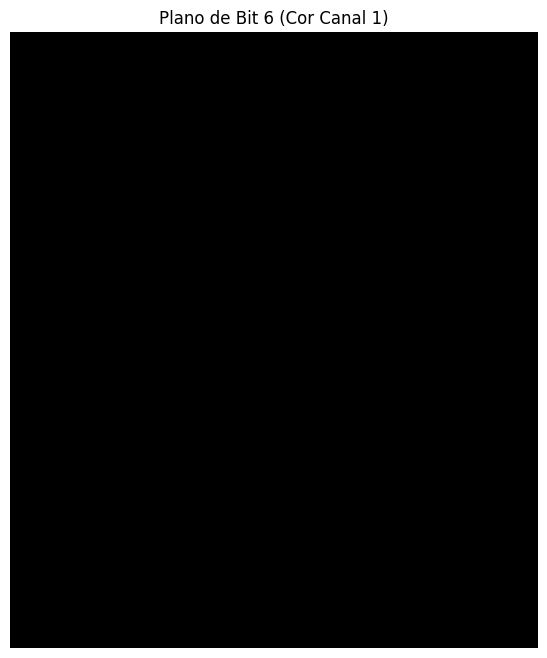

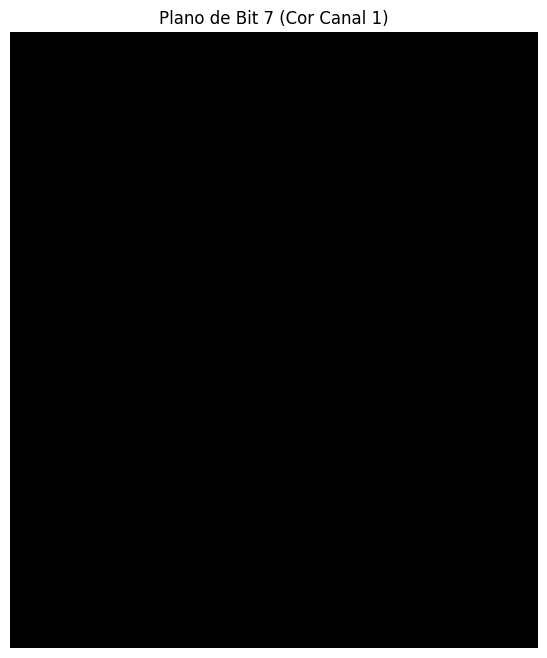

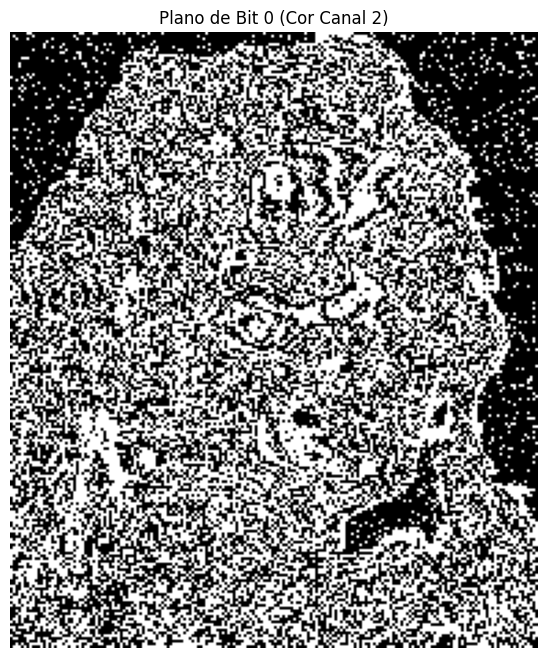

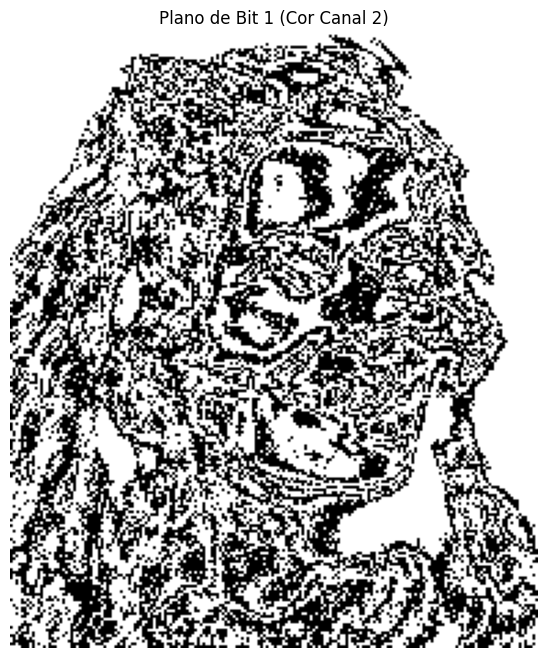

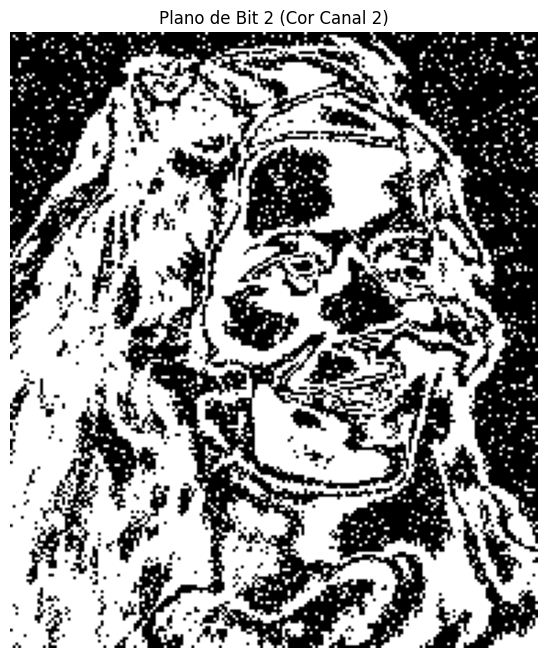

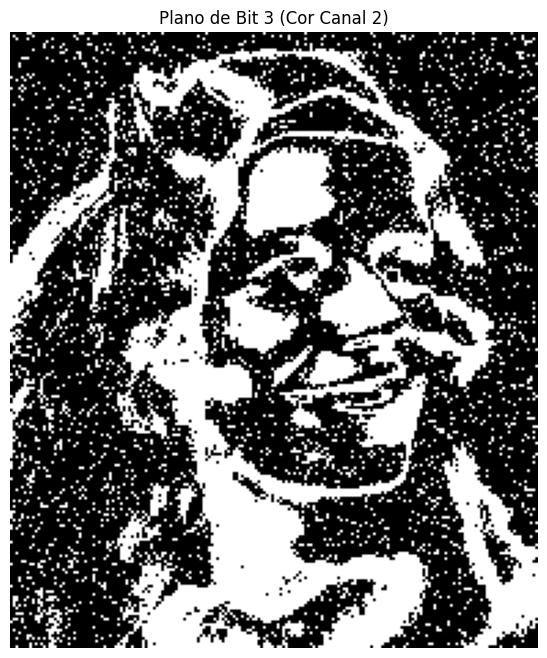

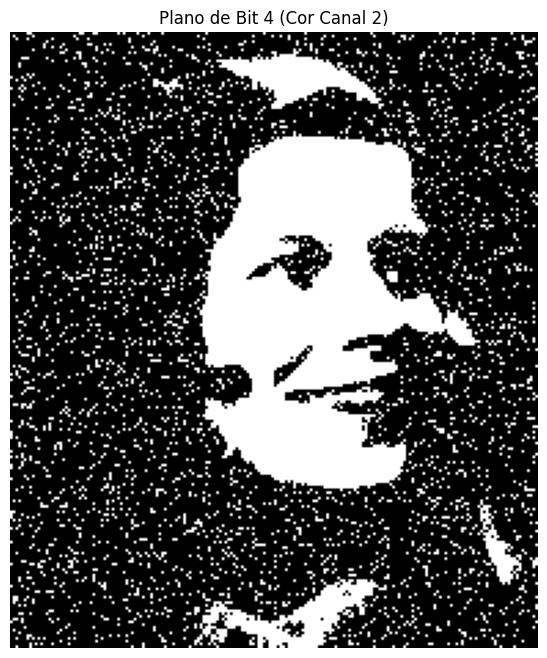

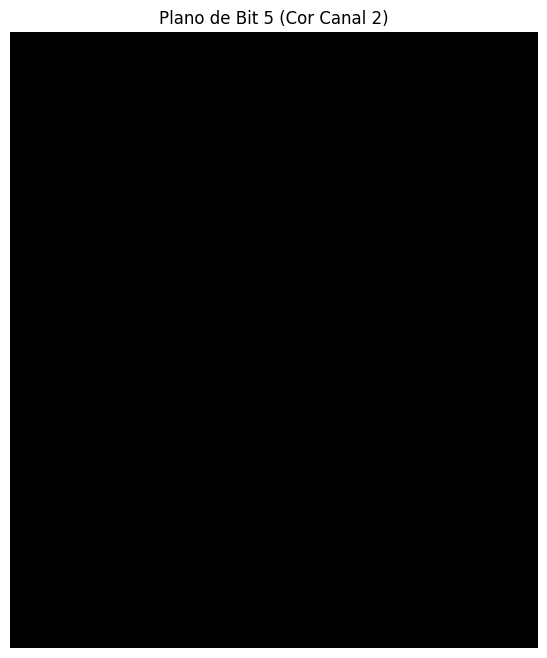

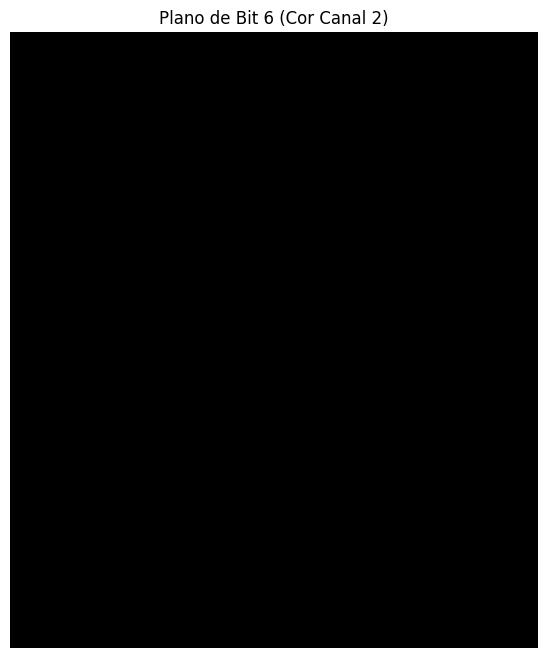

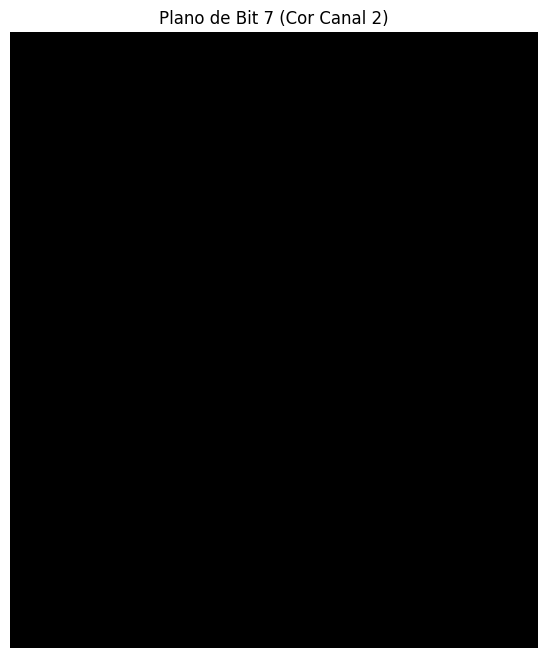

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Função para carregar imagens
def carregar_imagens():
    # Carregar imagem em tons de cinza
    img_cinza = cv2.imread('Fig0308(a)(fractured_spine).tif', cv2.IMREAD_GRAYSCALE)

    # Carregar imagem GIF com Pillow
    img_cor_pil = Image.open('enhance-me.gif').convert('RGB')


    img_cor = np.array(img_cor_pil)

    return img_cinza, img_cor

# 1. Transformação Logarítmica
def transformacao_logaritmica(imagem, c=1):
    imagem = np.array(imagem, dtype=np.float32)
    imagem_log = c * np.log(1 + imagem)
    imagem_log = np.uint8(255 * imagem_log / np.max(imagem_log))
    return imagem_log

# 2. Transformação de Potência (Gama)
def transformacao_gama(imagem, gama, c=1):
    imagem = np.array(imagem, dtype=np.float32) / 255.0
    imagem_gama = c * np.power(imagem, gama)
    imagem_gama = np.uint8(255 * imagem_gama)
    return imagem_gama

# 3. Representação de cada plano de bits
def planos_de_bits(imagem):
    if imagem is None:
        print("Erro: Imagem de entrada é None")
        return None
    planos = [(imagem >> i) & 1 for i in range(8)]
    return planos

# 4. Equalização do Histograma
def equalizacao_hist_manual(imagem):
    hist, bins = np.histogram(imagem.flatten(), 256, [0, 256])
    cdf = hist.cumsum()  # CDF
    cdf_normalizado = cdf * hist.max() / cdf.max()
    cdf = np.ma.masked_equal(cdf, 0)
    cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf = np.ma.filled(cdf, 0).astype('uint8')
    return cdf[imagem]

# Equalização com OpenCV
def equalizacao_hist_opencv(imagem):
    return cv2.equalizeHist(imagem)

# 5. Esteganografia simples
def inserir_mensagem(imagem_cobertura, imagem_mensagem):
    imagem_mensagem = imagem_mensagem // 128
    imagem_esteganografada = imagem_cobertura & 0b11111110 | imagem_mensagem
    return imagem_esteganografada

# 6. Função para mostrar imagens
def mostrar_imagens(imagens, titulos, em_cinza=True):
    plt.figure(figsize=(12, 8))
    for i, (imagem, titulo) in enumerate(zip(imagens, titulos)):
        plt.subplot(1, len(imagens), i + 1)
        if em_cinza:
            plt.imshow(imagem, cmap="gray")
        else:
            plt.imshow(imagem)
        plt.title(titulo)
        plt.axis('off')
    plt.show()

# 7. Execução principal
def principal():
    # Carregar as imagens
    img_cinza, img_cor = carregar_imagens()

    # Aplicar a transformação logarítmica
    img_log_cinza = transformacao_logaritmica(img_cinza, c=30)
    img_log_cor = transformacao_logaritmica(img_cor, c=30)

    # Aplicar a transformação de potência (gama)
    img_gama_cinza = transformacao_gama(img_cinza, gama=0.5)
    img_gama_cor = transformacao_gama(img_cor, gama=0.5)

    # Gerar os planos de bits
    planos_bits_cinza = planos_de_bits(img_cinza)
    planos_bits_cor = [planos_de_bits(img_cor[:, :, i]) for i in range(3)]
    # Equalização do histograma
    img_equalizada_manual_cinza = equalizacao_hist_manual(img_cinza)
    img_equalizada_opencv_cinza = equalizacao_hist_opencv(img_cinza)

    # Esteganografia simples
    mensagem_secreta = np.random.randint(0, 256, img_cinza.shape, dtype=np.uint8)
    img_esteganografada = inserir_mensagem(img_cinza, mensagem_secreta)

    # Exibir imagens em tons de cinza
    mostrar_imagens([img_cinza, img_log_cinza, img_gama_cinza],
                    ['Original (Cinza)', 'Logarítmica (Cinza)', 'Gama 0.5 (Cinza)'], em_cinza=True)

    # Exibir imagens coloridas
    mostrar_imagens([img_cor, img_log_cor, img_gama_cor],
                    ['Original (Colorida)', 'Logarítmica (Colorida)', 'Gama 0.5 (Colorida)'], em_cinza=False)

    # Exibir imagens de equalização
    mostrar_imagens([img_equalizada_manual_cinza, img_equalizada_opencv_cinza],
                    ['Equalização Manual (Cinza)', 'Equalização OpenCV (Cinza)'], em_cinza=True)

    # Exibir imagem esteganografada
    mostrar_imagens([img_esteganografada], ['Imagem Esteganografada'], em_cinza=True)
    # Exibir planos de bits
    bit_planes_gray = planos_de_bits(img_cinza)
    if bit_planes_gray:
        for i, plane in enumerate(bit_planes_gray):
            mostrar_imagens([plane], [f'Plano de Bit {i} (Cinza)'])
    bit_planes_color = [planos_de_bits(img_cor[:, :, i]) for i in range(3)]
    if bit_planes_color:
        for i in range(3):
            for j, plane in enumerate(bit_planes_color[i]):
                mostrar_imagens([plane], [f'Plano de Bit {j} (Cor Canal {i})'])

if __name__ == "__main__":
    principal()




Transformação Logarítmica:
Esse filtro ajuda a iluminar áreas escuras da imagem. Ele faz isso aumentando os tons escuros, tornando os detalhes mais visíveis, enquanto comprime os tons mais claros para evitar que fiquem muito brilhantes.

Transformação de Gama:  
Esse ajuste permite mexer com o brilho da imagem. Se você usar um valor baixo, a imagem fica mais clara; se usar um valor alto, ela escurece. É uma forma simples de deixar a imagem com a aparência que você deseja.

Planos de Bits:  
Aqui, a imagem é dividida em camadas, onde cada camada mostra uma parte da informação que compõe a imagem. Isso ajuda a entender melhor como a imagem é formada, mostrando detalhes e texturas que podem não ser visíveis na imagem original.

Equalização do Histograma:
Esse método melhora o contraste da imagem. Ele ajusta os tons para que eles fiquem mais distribuídos, fazendo com que as áreas claras fiquem ainda mais claras e as escuras, mais escuras. O resultado é uma imagem com mais detalhes.

Esteganografia:
Serve para esconder uma mensagem dentro de uma imagem. Ele pega uma parte da imagem que não é muito notada e a usa para guardar informações.